# Dart - Web Crawling!!!!

* 숨겨져 있는 URL의 속성을 어떻게 찾을 수 있을까? 이것을 찾지 못한다면 크롤링을 하는데 상당히 불편한 일이 많거나, 안되는 경우가 상당히 많음!!!

* 참고) Chrome HTTP Tracer 활용 참고 : http://blog.naver.com/PostView.nhn?blogId=yundongcheol&logNo=220606742182&categoryNo=72&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView

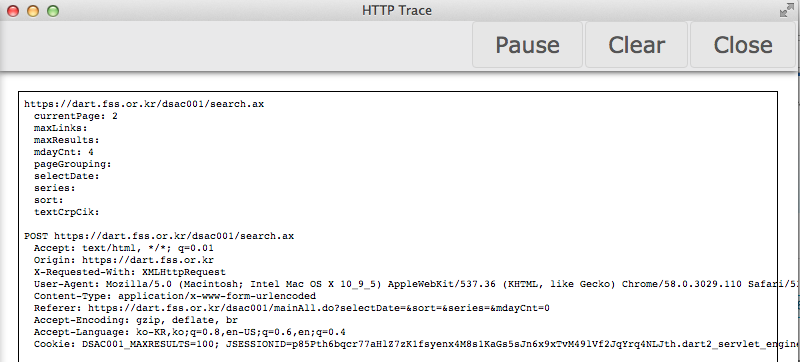

In [1]:
# 아래의 Chrome HTTP Tracer 를 활용하면, 숨겨져 있는 페이지의 구성 요소 및 관련 내용을 정확히 확인할 수 있어서 구체적인  페이즈 URL을 찾고 이를 활용해서 파싱하는데 유용한다.
img_path = u"/Users/minkyukwon/PycharmProjects/MachineLearning_Course/06_WebCrawling_DART/chrome_HTTP_Tracer.png"
from IPython.display import Image
Image(filename=img_path) 

In [47]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re

In [48]:
# 여기서 날짜만 yyyy.mm.dd 형식으로 지정!
# 참고: mdayCnt=1 하면, 기준 날짜를 중심으로 back 한 날짜의 정보를 탐색한다. 즉, 위에서 mdayCnt=1하면, 2017년 3월 27일의 정보를 탐색하게 됨!!!!
# 해당 날짜가 상당히 많은 rolling page 를 가지고 있어서 임!!!
date = "2017.03.28"
url_part1 = """http://dart.fss.or.kr/dsac001/mainAll.do?selectDate="""
url_part2 = """&sort=&series=&mdayCnt=0&currentPage="""
    
url = url_part1 + date + url_part2
print(url)

http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=


In [49]:
# 일단 전체 페이지 가지고 와서 전체 데이터 확인용...
res = requests.get(url)
soup=bs(res.text, 'html.parser')

In [4]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   최근공시
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- jquery 1.2.6 -->
  <script src="/js/prototype.js" type="text/javascript">
  </script>
  <script src="/js/jquery/jquery-all.js" type="text/javascript">
  </script>
  <!-- 2011.11.01 ext 2.3 -->
  <!--[if lte IE 8]><link rel="stylesheet" type="text/css" href="/js/ext-main/resources/css/ext-all-ie8.css" /><![endif]-->
  <!--[if (gte IE 9)|!(IE)]><!-->
  <link href="/js/ext-main/resources/css/ext-all.css" rel="stylesheet" type="text/css"/>
  <!--<![endif]-->
  <script src="/js/ext-main/adapter/ext/ext-base.js" type="text/javascript">
  </script>
  <script src="/js/ext-main/ext-all.js" type="text/javascript">
  </script>
  <!-- x-xerie

* 총 몇 건의 데이터가 있는지 확인

In [28]:
# 데이터 돌리면서 확인!!!!!
for i in range(0, len(soup.find_all("p"))):
    print(i)
    print(soup.find_all("p")[i])
    print("---------")

0
<p id="accessibility"><a href="#layoutMain">본문 바로가기</a></p>
---------
1
<p class="utill">
<!-- <ul class="topLink"> -->
<a href="/dsag002/loginForm.do"><img alt="로그인" src="/images/common/utill_login.gif" title="로그인"/></a>
<a href="/dsag003/main.do"><img alt="마이페이지" src="/images/common/utill_mypage.gif" title="마이페이지"/></a>
<a href="/dsaa003/searchGuide.do"><img alt="공시업무" src="/images/common/utill_gongsi.gif" title="공시업무"/></a>
<a href="/introduction/content1.do"><img alt="다트소개" src="/images/common/utill_intro.gif" title="다트소개"/></a>
<a href="https://opendart.fss.or.kr/intro/main.do" target="_blank"><img alt="오픈API" src="/images/common/utill_openapi.gif" title="오픈API"/></a>
<a href="/introduction/content6.do"><img alt="RSS이용안내" src="/images/common/utill_rss.gif" title="RSS이용안내"/></a>
<a class="end" href="/sitemap.do"><img alt="사이트맵" src="/images/common/utill_sitemap.gif" title="사이트맵"/></a>
</p>
---------
2
<p class="tit"><img alt="최근공시" src="/images/common/lnb_recent_disclosure.jpg" t

In [ ]:
totNum = re.sub("바꿀 대상", "변경하고자하는 값", 원본소스)

In [29]:
print (soup.find_all("p")[8])

<p class="page_info">
		[9/9] [총 894건]
	</p>


In [7]:
soup.find_all("p")[8].text

'\r\n\t\t[1/9] [총 894건]\r\n\t'

In [60]:
totNum

'\r\n\t\t[1/9] [총 894건]\r\n\t'

In [64]:
re.sub( r"\[총", "", totNum)

'\r\n\t\t[1/9]  894건]\r\n\t'

In [40]:
totNum

'\r\n\t\t 894\r\n\t'

In [42]:
re.sub( r"\n|\t|\r", "", totNum)

'\r 894\r'

In [75]:
soup.find_all("p")[8].text

'\r\n\t\t[1/9] [총 894건]\r\n\t'

In [56]:
totNum = soup.find_all("p")[8].text
totNum

'\r\n\t\t[1/9] [총 894건]\r\n\t'

In [11]:
totNum = re.sub("\\[.*\\] \\[", "", totNum)
totNum

'\r\n\t\t총 894건]\r\n\t'

In [12]:
totNum= re.sub(r"총","",totNum)
totNum

'\r\n\t\t 894건]\r\n\t'

In [13]:
totNum= re.sub(r"건]","",totNum)
totNum

'\r\n\t\t 894\r\n\t'

In [15]:
totNum.strip()

'894'

In [50]:
totNum = soup.find_all("p")[8].text
totNum

'\r\n\t\t[1/9] [총 894건]\r\n\t'

In [51]:
totNum = re.sub(r"\[.*\] \[총", "", totNum)
totNum

'\r\n\t\t 894건]\r\n\t'

In [52]:
totNum = re.sub(r"건\]", "", totNum)
totNum

'\r\n\t\t 894\r\n\t'

In [8]:
totNum = soup.find_all("p")[8].text
# ] 뒤에 스페이스 공란이 있으니 확인 부탁드립니다!
totNum = re.sub("\\[.*\\] \\[","",totNum)
totNum

'\r\n\t\t총 894건]\r\n\t'

In [77]:
print (totNum)


		총 894건]
	


In [18]:
totNum= re.sub(r"총","",totNum)
totNum

'\r\n\t\t 894건]\r\n\t'

In [9]:
totNum= re.sub(u"\ucd1d","",totNum)
print (totNum)


		 894건]
	


In [10]:
totNum = re.sub(u"\uac74","",totNum)
print (totNum)


		 894]
	


In [11]:
# 참고 :white space 제거
a = "        hi       "
a.strip()

'hi'

In [23]:
a.replace(" ","")

'hi'

In [53]:
totNum = re.sub("\\]","",totNum)
totNum = int(totNum)
totNum

894

* 위에서 한 결과를 바탕으로 전체적인 totNum 흐름을 완성하자

In [54]:
totNum = soup.find_all("p")[8].text
# ] 뒤에 스페이스 공란이 있으니 주의!!!!
totNum = re.sub("\\[.*\\] \\[","",totNum)
totNum
totNum= re.sub(u"\ucd1d","",totNum)
totNum = re.sub(u"\uac74","",totNum)
totNum = re.sub("\\]","",totNum)
totNum = int(totNum)
totNum

894

In [34]:
894//100

8

* 전체 롤링할 페이지 수 확인

In [55]:
# 전체 페이지 확인 코드
totNum = int(totNum)
totPage = int((totNum/100)+1)
totPage

9

* 참고) 완성할 부분에 대한 틀

In [15]:
resultData = pd.DataFrame()
resultData = resultData.append(
    {"pubTime":"", "ComName":"","Cat":"","coID":"", 
     "Content":"","reqDate":"","pubDate":"","rcpNo":""},ignore_index=True)
resultData

,Cat,ComName,Content,coID,pubDate,pubTime,rcpNo,reqDate
0,,,,,,,,


* 1개 페이지에 있는 공시정보  확인 규칙 - 01) 몇 개의 공시 정보가 있나?

In [16]:
len(soup.find_all("tr"))

101

In [17]:
soup.find_all("tr")[2]

<tr>
<td class="cen_txt">
						18:46
					</td>
<td>
<span class="nobr1" style="max-width:150px;">
<img alt="코스닥시장" src="/images/ico_kosdaq.gif" title="코스닥시장"/> 
							<a href="/dsae001/selectPopup.ax?selectKey=00364403" onclick="openCorpInfo('00364403'); return false;" title="쏠리드 기업개황 새창">
								쏠리드
							</a>
</span>
</td>
<td>
<a href="/dsaf001/main.do?rcpNo=20170328901048" id="r_20170328901048" onclick="openReportViewer('20170328901048'); return false;" title="불성실공시법인지정예고(공시불이행) 공시뷰어 새창">불성실공시법인지정예고
							
  							(공시불이행)
						</a>
</td>
<td title="코스닥시장본부"><div class="nobr" style="width:95px">코스닥시장본부</div></td>
<td class="cen_txt">2017.03.28</td>
<td class="cen_txt end"> <img alt="본 공시사항은 한국거래소 코스닥시장본부 소관임" hspace="1" src="/images/sub/remark05.gif" title="본 공시사항은 한국거래소 코스닥시장본부 소관임"/></td>
</tr>

In [8]:
len(soup.find_all("tr"))

101

In [9]:
soup.find_all("tr")[2]

<tr>
<td class="cen_txt">
						18:46
					</td>
<td>
<span class="nobr1" style="max-width:150px;">
<img alt="코스닥시장" src="/images/ico_kosdaq.gif" title="코스닥시장"/> 
							<a href="/dsae001/selectPopup.ax?selectKey=00364403" onclick="openCorpInfo('00364403'); return false;" title="쏠리드 기업개황 새창">
								쏠리드
							</a>
</span>
</td>
<td>
<a href="/dsaf001/main.do?rcpNo=20170328901048" id="r_20170328901048" onclick="openReportViewer('20170328901048'); return false;" title="불성실공시법인지정예고(공시불이행) 공시뷰어 새창">불성실공시법인지정예고
							
  							(공시불이행)
						</a>
</td>
<td title="코스닥시장본부"><div class="nobr" style="width:95px">코스닥시장본부</div></td>
<td class="cen_txt">2017.03.28</td>
<td class="cen_txt end"> <img alt="본 공시사항은 한국거래소 코스닥시장본부 소관임" hspace="1" src="/images/sub/remark05.gif" title="본 공시사항은 한국거래소 코스닥시장본부 소관임"/></td>
</tr>

In [10]:
print (len(soup.find_all("tr")))

101


* index =0 은 정보가 비어 있음;;;--> 1부터 정확한 정보가 들어옴!!!`

In [11]:
print (soup.find_all("tr")[0])
print("--------")
print (soup.find_all("tr")[1])

<tr>
<th scope="col">시간</th>
<th scope="col">공시대상회사</th>
<th scope="col">보고서명</th>
<th scope="col">제출인</th>
<th scope="col">접수일자</th>
<th scope="col">비고</th>
</tr>
--------
<tr>
<td class="cen_txt">
						18:58
					</td>
<td>
<span class="nobr1" style="max-width:150px;">
<img alt="코넥스시장" src="/images/ico_konex.gif" title="코넥스시장"/> 
							<a href="/dsae001/selectPopup.ax?selectKey=01109690" onclick="openCorpInfo('01109690'); return false;" title="포레스팅블록체인 기업개황 새창">
								포레스팅블록체인
							</a>
</span>
</td>
<td>
<a href="/dsaf001/main.do?rcpNo=20170328601049" id="r_20170328601049" onclick="openReportViewer('20170328601049'); return false;" title="감사보고서제출 공시뷰어 새창">감사보고서제출
							
  							
						</a>
</td>
<td title="포레스팅블록체인"><div class="nobr" style="width:95px">포레스팅블록체인</div></td>
<td class="cen_txt">2017.03.28</td>
<td class="cen_txt end"> <img alt="본 문서는 한국거래소 코넥스시장 소관임" hspace="1" src="/images/sub/remark09.gif" title="본 문서는 한국거래소 코넥스시장 소관임"/> <img alt="본 보고서 제출 후 정정신고가 있으니 관련 보고서를

In [12]:
soup.find_all("tr")[1]

<tr>
<td class="cen_txt">
						18:58
					</td>
<td>
<span class="nobr1" style="max-width:150px;">
<img alt="코넥스시장" src="/images/ico_konex.gif" title="코넥스시장"/> 
							<a href="/dsae001/selectPopup.ax?selectKey=01109690" onclick="openCorpInfo('01109690'); return false;" title="포레스팅블록체인 기업개황 새창">
								포레스팅블록체인
							</a>
</span>
</td>
<td>
<a href="/dsaf001/main.do?rcpNo=20170328601049" id="r_20170328601049" onclick="openReportViewer('20170328601049'); return false;" title="감사보고서제출 공시뷰어 새창">감사보고서제출
							
  							
						</a>
</td>
<td title="포레스팅블록체인"><div class="nobr" style="width:95px">포레스팅블록체인</div></td>
<td class="cen_txt">2017.03.28</td>
<td class="cen_txt end"> <img alt="본 문서는 한국거래소 코넥스시장 소관임" hspace="1" src="/images/sub/remark09.gif" title="본 문서는 한국거래소 코넥스시장 소관임"/> <img alt="본 보고서 제출 후 정정신고가 있으니 관련 보고서를 참조하시기 바람" hspace="1" src="/images/sub/remark01.gif" title="본 보고서 제출 후 정정신고가 있으니 관련 보고서를 참조하시기 바람"/></td>
</tr>

* 맨 마지막에 대한 수 확인

In [13]:
# python은 인덱스 시작을 0으로 하니, 101개에서 마지막의 숫자는 100이 됨!
print (soup.find_all("tr")[100])

<tr>
<td class="cen_txt">
						17:30
					</td>
<td>
<span class="nobr1" style="max-width:135px;">
<img alt="코스닥시장" src="/images/ico_kosdaq.gif" title="코스닥시장"/> 
							<a href="/dsae001/selectPopup.ax?selectKey=00657987" onclick="openCorpInfo('00657987'); return false;" title="KMH 기업개황 새창">
								KMH
							</a>
</span>
<span style="padding-left: 4px;"><a href="http://www.ikmh.co.kr/new_home/03_IR/01_stock.php" target="new"><img alt="기업 IR페이지 연결" border="0" src="/images/sub/btn_ir.gif" title="기업 IR페이지 연결"/> </a></span>
</td>
<td>
<a href="/dsaf001/main.do?rcpNo=20170328900922" id="r_20170328900922" onclick="openReportViewer('20170328900922'); return false;" title="정기주주총회결과 공시뷰어 새창">정기주주총회결과
							
  							
						</a>
</td>
<td title="KMH"><div class="nobr" style="width:95px">KMH</div></td>
<td class="cen_txt">2017.03.28</td>
<td class="cen_txt end"> <img alt="본 공시사항은 한국거래소 코스닥시장본부 소관임" hspace="1" src="/images/sub/remark05.gif" title="본 공시사항은 한국거래소 코스닥시장본부 소관임"/></td>
</tr>


* 2번 회사의 pubTime확인

In [43]:
soup.find_all("tr")[2].find("td").text

'\r\n\t\t\t\t\t\t10:18\r\n\t\t\t\t\t'

In [33]:
soup.find_all("tr")[2].find("td").text.strip()

'18:46'

In [14]:
print (soup.find_all("tr")[2])

<tr>
<td class="cen_txt">
						18:46
					</td>
<td>
<span class="nobr1" style="max-width:150px;">
<img alt="코스닥시장" src="/images/ico_kosdaq.gif" title="코스닥시장"/> 
							<a href="/dsae001/selectPopup.ax?selectKey=00364403" onclick="openCorpInfo('00364403'); return false;" title="쏠리드 기업개황 새창">
								쏠리드
							</a>
</span>
</td>
<td>
<a href="/dsaf001/main.do?rcpNo=20170328901048" id="r_20170328901048" onclick="openReportViewer('20170328901048'); return false;" title="불성실공시법인지정예고(공시불이행) 공시뷰어 새창">불성실공시법인지정예고
							
  							(공시불이행)
						</a>
</td>
<td title="코스닥시장본부"><div class="nobr" style="width:95px">코스닥시장본부</div></td>
<td class="cen_txt">2017.03.28</td>
<td class="cen_txt end"> <img alt="본 공시사항은 한국거래소 코스닥시장본부 소관임" hspace="1" src="/images/sub/remark05.gif" title="본 공시사항은 한국거래소 코스닥시장본부 소관임"/></td>
</tr>


In [15]:
soup.find_all("tr")[2].find("td")

<td class="cen_txt">
						18:46
					</td>

In [16]:
soup.find_all("tr")[2].find("td").text

'\r\n\t\t\t\t\t\t18:46\r\n\t\t\t\t\t'

In [17]:
soup.find_all("tr")[2].find_all("td", class_="cen_txt")[0].text.strip()

'18:46'

In [36]:
soup.find_all("tr")[2].find("td")

<td class="cen_txt">
						18:46
					</td>

In [37]:
soup.find_all("tr")[2].find_all("td", class_="cen_txt")

[<td class="cen_txt">
 						18:46
 					</td>,
 <td class="cen_txt">2017.03.28</td>,
 <td class="cen_txt end"> <img alt="본 공시사항은 한국거래소 코스닥시장본부 소관임" hspace="1" src="/images/sub/remark05.gif" title="본 공시사항은 한국거래소 코스닥시장본부 소관임"/></td>]

In [18]:
print (soup.find_all("tr")[2].find_all("td", class_="cen_txt"))

[<td class="cen_txt">
						18:46
					</td>, <td class="cen_txt">2017.03.28</td>, <td class="cen_txt end"> <img alt="본 공시사항은 한국거래소 코스닥시장본부 소관임" hspace="1" src="/images/sub/remark05.gif" title="본 공시사항은 한국거래소 코스닥시장본부 소관임"/></td>]


In [92]:
print(soup.find_all("tr")[2].find_all("td", class_="cen_txt")[0])

<td class="cen_txt">
						18:46
					</td>


In [93]:
print(soup.find_all("tr")[2].find_all("td", class_="cen_txt")[0].text)


						18:46
					


In [94]:
print(str(soup.find_all("tr")[2].find_all("td", class_="cen_txt")[0].text).strip())

18:46


* 2번째 공시의 회사 정보 찾기

In [38]:
soup.find_all("tr")[2].find("a")

<a href="/dsae001/selectPopup.ax?selectKey=00364403" onclick="openCorpInfo('00364403'); return false;" title="쏠리드 기업개황 새창">
								쏠리드
							</a>

In [39]:
soup.find_all("tr")[2].find("a").text

'\r\n\t\t\t\t\t\t\t\t쏠리드\r\n\t\t\t\t\t\t\t'

In [40]:
soup.find_all("tr")[2].find("a").text.strip()

'쏠리드'

* 2번째 공시 회사의 소속 시장 확인(코스피, 코스닥, 기타...)

In [46]:
soup.find_all("tr")[2].find_all("td")[1].find("img").get("title")

'코스닥시장'

In [99]:
print (soup.find_all("tr")[2].find_all("td")[1].find("img").get("title"))

코스닥시장


In [97]:
print (str(soup.find_all("tr")[2].find_all("td")[1].find("img").get("title")).strip())

코스닥시장


* 2번 회사의 고유값 추출

In [50]:
soup.find_all("tr")[2].find("a")

<a href="/dsae001/selectPopup.ax?selectKey=00364403" onclick="openCorpInfo('00364403'); return false;" title="쏠리드 기업개황 새창">
								쏠리드
							</a>

In [49]:
soup.find_all("tr")[2].find("a").get("href")

'/dsae001/selectPopup.ax?selectKey=00364403'

In [51]:
temp = soup.find_all("tr")[2].find("a").get("href")

In [20]:
re.sub("\\/dsae001\\/selectPopup.ax\\?selectKey=","",temp)

'00364403'

In [54]:
re.findall(r"[0-9]{8}", temp)[0]

'00364403'

In [102]:
# 1개 페이지에 있는 공시정보  확인 규칙 - 05) 1개 회사에서 회사 id 확인
print (str(soup.find_all("tr")[2].find_all("td")[1].find("a").get("href")))
testStr = str(soup.find_all("tr")[2].find_all("td")[1].find("a").get("href"))
print (re.findall(r"[0-9]{8}",testStr)[0])

/dsae001/selectPopup.ax?selectKey=00364403
00364403


* 기타 내용

2번째 회사 쏠리드에 대한 정보를 추출하세요!!!!
- 공시 시간
- 공시 회사 이름
- 회사가 속한 시장 종류 : 코스닥/유가증권, 코넥스 ...
- 회사 id값
- 공시 이름
- 해당 공시의 고유값
- 제출일

In [56]:
# 1개 페이지에 있는 공시정보  확인 규칙 - 06) 기타 내용 확인
# [0]은 정보를 알려주고 있어서 skip
print (soup.find_all("tr")[0])
print (soup.find_all("tr")[1])
# 시간
print (str(soup.find_all("tr")[1].find_all("td", class_="cen_txt")[0].text).strip())
# 회사
print (str(soup.find_all("tr")[1].find("a").text).strip())
# 시장종류
print (str(soup.find_all("tr")[1].find_all("td")[1].find("img").get("title")).strip())
# 코드번호 
tempStr = str(soup.find_all("tr")[1].find_all("td")[1].find("a").get("href"))
print (re.findall(r"[0-9]{8}",tempStr)[0])
# 보고서명
print (str(soup.find_all("tr")[1].find_all("td")[2].find("a").text).strip())
# 제출일
print (str(soup.find_all("tr")[1].find_all("td")[4].text).strip())

<tr>
<th scope="col">시간</th>
<th scope="col">공시대상회사</th>
<th scope="col">보고서명</th>
<th scope="col">제출인</th>
<th scope="col">접수일자</th>
<th scope="col">비고</th>
</tr>
<tr>
<td class="cen_txt">
						18:58
					</td>
<td>
<span class="nobr1" style="max-width:150px;">
<img alt="코넥스시장" src="/images/ico_konex.gif" title="코넥스시장"/> 
							<a href="/dsae001/selectPopup.ax?selectKey=01109690" onclick="openCorpInfo('01109690'); return false;" title="도부마스크 기업개황 새창">
								도부마스크
							</a>
</span>
</td>
<td>
<a href="/dsaf001/main.do?rcpNo=20170328601049" id="r_20170328601049" onclick="openReportViewer('20170328601049'); return false;" title="감사보고서제출 공시뷰어 새창">감사보고서제출
							
  							
						</a>
</td>
<td title="도부마스크"><div class="nobr" style="width:95px">도부마스크</div></td>
<td class="cen_txt">2017.03.28</td>
<td class="cen_txt end"> <img alt="본 문서는 한국거래소 코넥스시장 소관임" hspace="1" src="/images/sub/remark09.gif" title="본 문서는 한국거래소 코넥스시장 소관임"/> <img alt="본 보고서 제출 후 정정신고가 있으니 관련 보고서를 참조하시기 바람" hspace="1"

In [86]:
import time

In [92]:
t1 = time.time()
totPage = int((totNum/100)+1)

resultData = pd.DataFrame()
resultData_temp = pd.DataFrame()
resultData_temp = resultData_temp.append(
    {"pubTime":"", "ComName":"","Cat":"","coID":"", 
     "Content":"","reqDate":"","pubDate":"","rcpNo":""},ignore_index=True)

pubTime_idx = resultData_temp.columns.get_loc("pubTime")
comName_idx = resultData_temp.columns.get_loc("ComName")
cat_idx = resultData_temp.columns.get_loc("Cat")
co_dix=resultData_temp.columns.get_loc("coID")
content_idx=resultData_temp.columns.get_loc("Content")
req_idx= resultData_temp.columns.get_loc("reqDate")
pubDate_idx = resultData_temp.columns.get_loc("pubDate")
rcp_idx=resultData_temp.columns.get_loc("rcpNo")

# 전체 페이지를 롤링해야 하는 부분!!!
for page in range(1, totPage+1):
    print (str(page))
    urlrolling = url + str(page)
    tempXML = requests.get(urlrolling)
    soup=bs(tempXML.text, 'html.parser')
    print (urlrolling)
    
    # 각 페이지에서 얻은 정보의 숫자 확인 
    tempNumCont = len(soup.find_all("tr"))
    print (tempNumCont)
    
    for j in range(1, tempNumCont):
        resultData_temp.iat[0,pubTime_idx] = str(soup.find_all("tr")[j].find_all("td", class_="cen_txt")[0].text).strip()
        resultData_temp.iat[0,comName_idx] = str(soup.find_all("tr")[j].find("a").text).strip()
        resultData_temp.iat[0,cat_idx] = str(soup.find_all("tr")[j].find_all("td")[1].find("img").get("title")).strip()
        tempStr = str(soup.find_all("tr")[j].find_all("td")[1].find("a").get("href"))
        resultData_temp.iat[0,co_dix] = re.findall(r"[0-9]{8}",tempStr)[0]
        tempStr = str(soup.find_all("tr")[j].find_all("td")[2].find("a").text).strip()
        resultData_temp.iat[0,content_idx] = re.sub("\r|\n|\t","",tempStr)
        resultData_temp.iat[0,req_idx] = str(soup.find_all("tr")[j].find_all("td")[4].text).strip()
        # 앞에서 url 생성하는 부분에서 date정의함!
        resultData_temp.iat[0,pubDate_idx] = date
        tempStr = str(soup.find_all("tr")[j].find_all("td")[2].find("a").get("href"))
        resultData_temp.iat[0, rcp_idx] = re.findall(r"[0-9]{14}",tempStr)[0]
        # 상세 정보에 대한 것은 종류마다 다 달라서 다시 요청해서 받으려면;;;
        # 이 부분에 대한 rcpNo를 가지고 다시 요청해서 상세 정보를 채우는 부분을 해야하는데,,,워낙 좀 다양해서;;;
        resultData = resultData.append(resultData_temp, ignore_index=True)
        
        for k in range(0,len(resultData_temp.columns)):
            resultData_temp.iat[0,k] = ""
t2 =time.time()
print(t2-t1)

1
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=1
101
2
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=2
101
3
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=3
101
4
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=4
101
5
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=5
101
6
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=6
101
7
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=7
101
8
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=8
101
9
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=9
95
10.505955219268799


In [83]:
resultData.head(5)

,Cat,ComName,Content,coID,pubDate,pubTime,rcpNo,reqDate
0,코넥스시장,도부마스크,감사보고서제출,01109690,2017.03.28,18:58,20170328601049,2017.03.28
1,코스닥시장,쏠리드,불성실공시법인지정예고 (공시불이행),00364403,2017.03.28,18:46,20170328901048,2017.03.28
2,코스닥시장,코디,주권매매거래정지 (불성실공시법인 지정),00308559,2017.03.28,18:35,20170328901037,2017.03.28
3,코스닥시장,코디,불성실공시법인지정 (공시불이행),00308559,2017.03.28,18:35,20170328901047,2017.03.28
4,기타법인,위너지스,주권매매거래정지 (불성실공시법인 지정),00207223,2017.03.28,18:29,20170328901039,2017.03.28


In [84]:
resultData.tail(5)

,Cat,ComName,Content,coID,pubDate,pubTime,rcpNo,reqDate
889,기타법인,바이더웨이,임원의변동,00178806,2017.03.28,07:00,20170327000959,2017.03.28
890,기타법인,케이엔에프인터내셔날,[기재정정]감사보고서 (2016.12),01083000,2017.03.28,07:00,20170327000967,2017.03.28
891,기타법인,케이피엑스글로벌,감사보고서 (2016.12),01078868,2017.03.28,07:00,20170327000958,2017.03.28
892,기타법인,코리아세븐,동일인등출자계열회사와의상품ㆍ용역거래,00186513,2017.03.28,07:00,20170327000962,2017.03.28
893,기타법인,코릴,감사보고서 (2016.12),00862826,2017.03.28,07:00,20170327000968,2017.03.28


In [23]:
len(resultData)

894

* 위의 방식이 속도가 너무 느린 단점.

In [93]:
t1 =time.time()
totPage = int((int(totNum)/100)+1)

resultData = pd.DataFrame()
#resultData = resultData.append({"pubTime":"", "ComName":"", "Cat":"", "coID":"", "Content":"", "reqDate":"", "pubDate":"","rcpNo":""}, ignore_index=True)
# 전체 페이지를 롤링해야 하는 부분!!!
for page in range(1, totPage+1):
#for page in range(1, 2):
    print (str(page))
    urlrolling = url + str(page)
    tempXML = requests.get(urlrolling)
    soup=bs(tempXML.text, 'html.parser')
    print (urlrolling)
    
    # 각 페이지에서 얻은 정보의 숫자 확인 
    tempNumCont = len(soup.find_all("tr"))
    print (tempNumCont)
    
    for j in range(1, tempNumCont):
        # 필요한 정보들을 변수에 담기!!!!
        d_pubTime =""
        d_pubTime = str(soup.find_all("tr")[j].find_all("td", class_="cen_txt")[0].text).strip()
        d_ComName = ""
        d_ComName = str(soup.find_all("tr")[j].find("a").text).strip()
        d_Cat= ""
        d_Cat = str(soup.find_all("tr")[j].find_all("td")[1].find("img").get("title")).strip()
        tempStr = ""
        tempStr = str(soup.find_all("tr")[j].find_all("td")[1].find("a").get("href"))
        d_coID = ""
        d_coID = re.findall(r"[0-9]{8}",tempStr)[0]
        tempStr = ""
        tempStr = str(soup.find_all("tr")[j].find_all("td")[2].find("a").text).strip()
        d_Content = ""
        d_Content = re.sub("\r|\n|\t","",tempStr)
        d_reqDate = ""
        d_reqDate = str(soup.find_all("tr")[j].find_all("td")[4].text).strip()
        d_pubDate = date
        tempStr= ""
        tempStr = str(soup.find_all("tr")[j].find_all("td")[2].find("a").get("href"))
        d_rcpNo = ""
        d_rcpNo = re.findall(r"[0-9]{14}",tempStr)[0]
#        temp_data = {"pubTime":d_pubTime, "ComName":d_ComName, "Cat":d_Cat, "coID":d_coID, "Content":d_Content, "reqDate":d_reqDate, "pubDate":d_pubDate,"rcpNo":d_rcpNo}
        temp_data = {"pubTime":[d_pubTime], "ComName":[d_ComName], "Cat":[d_Cat], "coID":[d_coID], "Content":[d_Content], "reqDate":[d_reqDate], "pubDate":[d_pubDate],"rcpNo":[d_rcpNo]}
        temp_data = pd.DataFrame.from_dict(temp_data,orient='columns')
#        print(temp_data)
        resultData = pd.concat([resultData,temp_data],ignore_index=True)
    # 만든 변수들을 초기화!!!!
#         temp_data = {"pubTime":"", "ComName":"", "Cat":"", "coID":"", "Content":"", "reqDate":"", "pubDate":"","rcpNo":""}
#         temp_data = {"pubTime":[""], "ComName":[""], "Cat":[""], "coID":[""], "Content":[""], "reqDate":[""], "pubDate":[""],"rcpNo":[""]}
        
        
t2 =time.time()
print(t2-t1)

1
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=1
101
2
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=2
101
3
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=3
101
4
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=4
101
5
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=5
101
6
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=6
101
7
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=7
101
8
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=8
101
9
http://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2017.03.28&sort=&series=&mdayCnt=0&currentPage=9
95
10.37733006477356


In [25]:
resultData.head()

,pubTime,ComName,Cat,coID,Content,reqDate,pubDate,rcpNo
0,18:58,도부마스크,코넥스시장,01109690,감사보고서제출,2017.03.28,2017.03.28,20170328601049
1,18:46,쏠리드,코스닥시장,00364403,불성실공시법인지정예고 (공시불이행),2017.03.28,2017.03.28,20170328901048
2,18:35,코디,코스닥시장,00308559,주권매매거래정지 (불성실공시법인 지정),2017.03.28,2017.03.28,20170328901037
3,18:35,코디,코스닥시장,00308559,불성실공시법인지정 (공시불이행),2017.03.28,2017.03.28,20170328901047
4,18:29,위너지스,기타법인,00207223,주권매매거래정지 (불성실공시법인 지정),2017.03.28,2017.03.28,20170328901039


In [26]:
resultData.tail()

,pubTime,ComName,Cat,coID,Content,reqDate,pubDate,rcpNo
889,07:00,바이더웨이,기타법인,00178806,임원의변동,2017.03.28,2017.03.28,20170327000959
890,07:00,케이엔에프인터내셔날,기타법인,01083000,[기재정정]감사보고서 (2016.12),2017.03.28,2017.03.28,20170327000967
891,07:00,케이피엑스글로벌,기타법인,01078868,감사보고서 (2016.12),2017.03.28,2017.03.28,20170327000958
892,07:00,코리아세븐,기타법인,00186513,동일인등출자계열회사와의상품ㆍ용역거래,2017.03.28,2017.03.28,20170327000962
893,07:00,코릴,기타법인,00862826,감사보고서 (2016.12),2017.03.28,2017.03.28,20170327000968
